In [1]:
import json
import facebook
import requests
import pandas as pd
import numpy as np
from mytoken import *

Para acceder a facebook API Graph [API Graph de Facebook](https://developers.facebook.com/tools/explorer/?classic=0)

In [2]:
graph = facebook.GraphAPI(access_token=fb_token)

In [3]:
graph.get_permissions('me')

{'public_profile', 'user_posts'}

# Tagged places in posts

In [7]:
posts = graph.get_connections("me", "posts", fields='id, create_time, place')

In [8]:
posts

{'data': [{'id': '3098477393806286_3098549150465777',
   'place': {'name': 'Rio Seco - Cieneguilla',
    'location': {'city': 'Cieneguilla',
     'country': 'Peru',
     'latitude': -12.069861200184,
     'longitude': -76.756938825154,
     'street': 'Cieneguilla',
     'zip': '15593'},
    'id': '762042293839221'}},
  {'id': '3098477393806286_3085582468429112'},
  {'id': '3098477393806286_3034397183547641'},
  {'id': '3098477393806286_2942639219390105'},
  {'id': '3098477393806286_2870141149973246'},
  {'id': '3098477393806286_2820320424955319'},
  {'id': '3098477393806286_2806520073002021'},
  {'id': '3098477393806286_2681718802148816'},
  {'id': '3098477393806286_2646041762383187'},
  {'id': '3098477393806286_2607536146233749'},
  {'id': '3098477393806286_2601702970150400'},
  {'id': '3098477393806286_2588871718100192'},
  {'id': '3098477393806286_2553817238272307'},
  {'id': '3098477393806286_2545415172445847'},
  {'id': '3098477393806286_2335751856745514'},
  {'id': '3098477393806

<div class="alert alert-warning">
    <strong>Warning:</strong> Si obtenemos posts cuando no tengo permisos, obtengo un arreglo vacio.
</div>

In [9]:
len(posts['data'])

25

In [10]:
posts = requests.get(posts['paging']['next']).json()
posts['data'][:5]

[{'id': '3098477393806286_2166689293651772'},
 {'id': '3098477393806286_2166687116985323'},
 {'id': '3098477393806286_2162707674049934'},
 {'id': '3098477393806286_2129023824084986'},
 {'id': '3098477393806286_2101144726872896'}]

In [11]:
def Getposts(id='me', perimetro='posts', fields=['id', 'created_time', 'place']):
    lst = []
    posts = graph.get_connections(id, perimetro, fields=','.join(fields))
    
    while True:
        try:
            for post in posts['data']:
                if 'place' in post.keys():
                    lst.append(post)
            
            posts = request.get(posts['paging']['next']).json()
        except:
            break
    
    return lst

In [13]:
posts = Getposts()

print("Se han extraido {0} etiquetas".format( len(posts) ))
if len(posts) > 0:
    print("Un ejemplo de un registro de posts: \n")
    print(json.dumps(posts[0], indent=4))

Se han extraido 1 etiquetas
Un ejemplo de un registro de posts: 

{
    "id": "3098477393806286_3098549150465777",
    "created_time": "2022-01-17T16:48:51+0000",
    "place": {
        "name": "Rio Seco - Cieneguilla",
        "location": {
            "city": "Cieneguilla",
            "country": "Peru",
            "latitude": -12.069861200184,
            "longitude": -76.756938825154,
            "street": "Cieneguilla",
            "zip": "15593"
        },
        "id": "762042293839221"
    }
}


Obtener la latitud y longitud del dataset

In [14]:
dfposts = pd.DataFrame(posts)[['id', 'created_time', 'place']]
dfposts

,id,created_time,place
0,3098477393806286_3098549150465777,2022-01-17T16:48:51+0000,"{'name': 'Rio Seco - Cieneguilla', 'location':..."


In [21]:
func = lambda x: print(json.dumps(x, indent=4))

func(dfposts['place'].iloc[0])  #index location

{
    "name": "Rio Seco - Cieneguilla",
    "location": {
        "city": "Cieneguilla",
        "country": "Peru",
        "latitude": -12.069861200184,
        "longitude": -76.756938825154,
        "street": "Cieneguilla",
        "zip": "15593"
    },
    "id": "762042293839221"
}


In [23]:
dfposts['place'].iloc[0]['location']['latitude']

-12.069861200184

In [24]:
dfposts['place'].apply(lambda p: p['location']['latitude'] if 'location' in p.keys() else None)

0   -12.069861
Name: place, dtype: float64

Crear 3 nuevas columnas llamadas 'longitud', 'latitud' y 'name_place' basados en el campo 'place'.

In [26]:
dfposts['latitud'] = dfposts['place'].apply(lambda p: 
                                            p['location']['latitude']
                                           if 'location' in p else None)
dfposts['longitud'] = dfposts['place'].apply(lambda p: 
                                            p['location']['longitude']
                                           if 'location' in p else None)
dfposts['name_place'] = dfposts['place'].apply(lambda p: p['name'])

In [27]:
dfposts

,id,created_time,place,latitud,longitud,name_place
0,3098477393806286_3098549150465777,2022-01-17T16:48:51+0000,"{'name': 'Rio Seco - Cieneguilla', 'location':...",-12.069861,-76.756939,Rio Seco - Cieneguilla


In [28]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1 non-null      object 
 1   created_time  1 non-null      object 
 2   place         1 non-null      object 
 3   latitud       1 non-null      float64
 4   longitud      1 non-null      float64
 5   name_place    1 non-null      object 
dtypes: float64(2), object(4)
memory usage: 176.0+ bytes


Elinaremos aquellos de latitud nullo.

In [29]:
dfposts = dfposts.loc[~dfposts['latitud'].isnull()]

Necesitamos instalar los siguientes componentes:
- !pip install shapely
- !pip install geopandas
- !pip install descartes

Imprimir el gráfico, 'mapbox' puede generar ciudad, mapas de calor, lo importante es saber ¿Donde se estan encontrando la mayor cantidad de personas?

instalar el paquete 'geopandas' para visualización de lugares

In [ ]:
!conda install -c conda-forge geopandas

In [ ]:
!conda list

In [ ]:
!conda install -c conda-forge rtree=0.9.3

In [ ]:
!conda uninstall pyproj
!conda install -c conda-forge pyproj 

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

<AxesSubplot:>

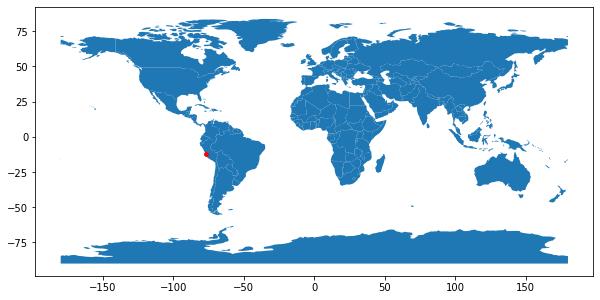

In [32]:
df = dfposts[['longitud', 'latitud']]

geometry = [ Point(xy) for xy in zip(df['longitud'], df['latitud'])]
gdf = GeoDataFrame(df, geometry = geometry)

#This is a single map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot( ax=world.plot(figsize=(10, 8)), marker='o', color='red', markersize=15)